<a href="https://colab.research.google.com/github/VeronikaShe/ML-study/blob/main/HW_1_Log_SVM_SHEMYAKINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Модель логистической регрессии
<p id="3">Классификации физических лиц по уровню дохода.</p>

In [55]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [56]:
# датасет
data = pd.read_csv('https://raw.githubusercontent.com/VeronikaShe/ML-study/refs/heads/main/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [58]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [59]:
np.unique(data['occupation'])

array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving'], dtype=object)

In [60]:
data.replace('?', np.nan , inplace=True)

In [61]:
data.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [62]:
# удаляем ячейки с отсутствием данных
data = data[~(data['occupation'].isna())]
data = data[~(data['native-country'].isna())]
data = data[~(data['workclass'].isna())]

In [63]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


#### <p style="align: center;">Шаг 1 Предобработка данных.


In [64]:
data = data[['age',	'workclass',	'fnlwgt',	'educational-num',	'marital-status',	'occupation',	'relationship',	'race',	'gender',	'capital-gain',	'capital-loss',	'hours-per-week',	'native-country',	'income']]

In [65]:

X = data.drop(columns=['income'])

In [66]:
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['income'])
y = le.transform(data['income'])

le.fit(data['occupation'])
oc = le.transform(data['occupation'])

le.fit(data['race'])
re = le.transform(data['race'])

le.fit(data['marital-status'])
ma = le.transform(data['marital-status'])

le.fit(data['workclass'])
wo = le.transform(data['workclass'])

le.fit(data['relationship'])
rl = le.transform(data['relationship'])

le.fit(data['gender'])
ge = le.transform(data['gender'])

le.fit(data['native-country'])
nc = le.transform(data['native-country'])

dataNormal = {'age': data['age'],'workclass': wo,  'educational-num':data['educational-num'], 'marital-status':ma, 'occupation':oc, 'gender':re, 'hours-per-week':data['hours-per-week'],'native-country':nc}

X = pd.DataFrame(dataNormal)


Изобразим зависимость признака income от educational-num (на графиике оранжевым - количество признака <=50K, синим - количество признака >50K)

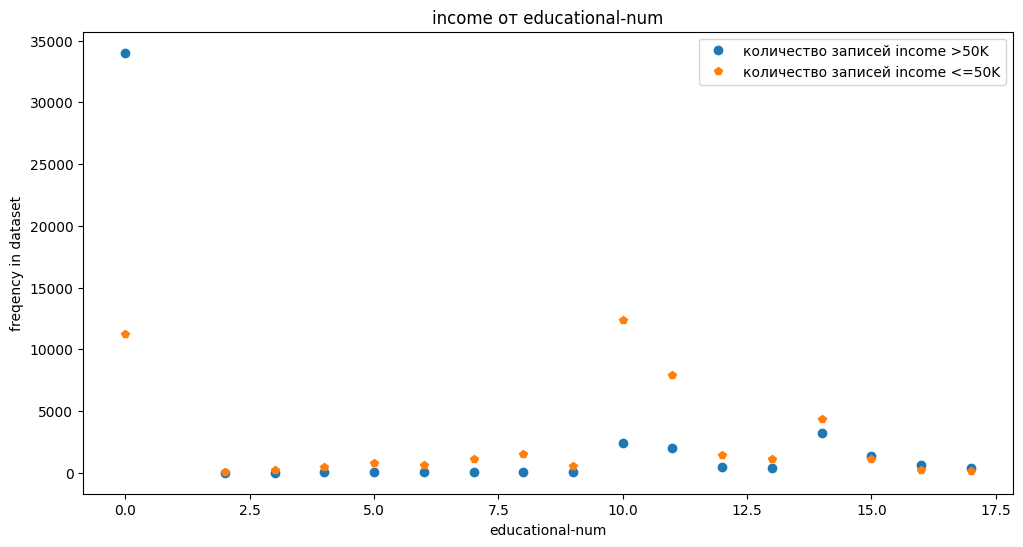

In [76]:

a1, a2 = np.unique((data['educational-num']+1)*y, return_counts=True)
a11, a12 = np.unique((data['educational-num']+1)*(1-y), return_counts=True)
plt.figure(figsize=(12,6))
plt.plot(a1, a2, 'o')
plt.plot(a11, a12, 'p')
plt.title('income от educational-num')
plt.xlabel('educational-num')
plt.ylabel('freqency in dataset')
plt.legend(['количество записей income >50K','количество записей income <=50K'])
plt.show()

Зависимость признака income от occupation (на графиике оранжевым - количество признака <=50K, синим - количество признака >50K)

In [77]:
b1, b2 = np.unique((oc+1)*y, return_counts=True)
b11, b12 = np.unique((oc+1)*(1-y), return_counts=True)

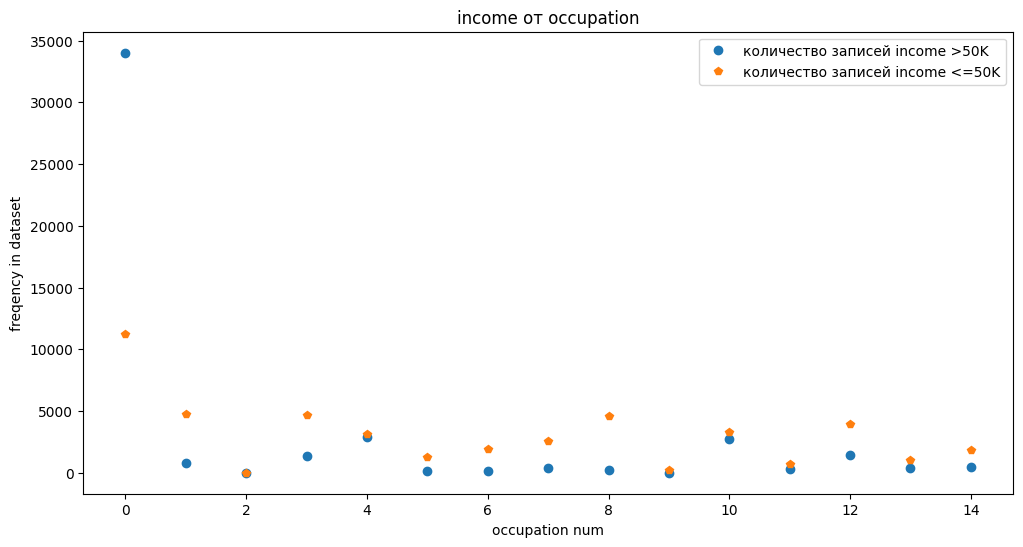

In [78]:
plt.figure(figsize=(12,6))
plt.plot(b1, b2, 'o')
plt.plot(b11, b12, 'p')
plt.title('income от occupation')
plt.xlabel('occupation num')
plt.ylabel('freqency in dataset')
plt.legend(['количество записей income >50K','количество записей income <=50K'])
plt.show()

In [79]:
X.head()

,age,workclass,educational-num,marital-status,occupation,gender,hours-per-week,native-country
0,25,2,7,4,6,2,40,38
1,38,2,9,2,4,4,50,38
2,28,1,12,2,10,4,40,38
3,44,2,10,2,6,2,40,38
5,34,2,6,4,7,4,30,38


In [80]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression классификация
# LinearRegression регрессия

In [81]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(max_iter=500)

#### Шаг 2 Обучение.


 Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.index

Index([21762, 21701, 42663, 42694, 13590, 47537, 42284,  2021, 48236, 46692,
       ...
       37091, 23113,  3379, 11398, 28500, 37210, 23727, 19600, 34019, 40039],
      dtype='int64', length=13567)

In [83]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [84]:
predictions[100:105] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 0])

In [85]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
model.predict_proba(X_test)

array([[0.99072281, 0.00927719],
       [0.88825915, 0.11174085],
       [0.66683049, 0.33316951],
       ...,
       [0.94974679, 0.05025321],
       [0.9404254 , 0.0595746 ],
       [0.71736149, 0.28263851]])

Метрика accuracy https://youtu.be/CCH-1gJo_z0


<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [93]:
model.score(X_train, y_train)

0.7844258410993524

In [94]:
model.score(X_test, y_test)

0.786540871231665

Метод опорных векторов. SVM.

In [92]:
from sklearn.svm import SVC

clf = SVC(kernel='poly')
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [33]:
clf.score(X_train, y_train)


0.7922287158426788

In [34]:
clf.score(X_test, y_test)


0.797523402373406

a) преобразования с данными:
- замена '?' на NaN,
- исключение из дата-сета срок со сначениями NaN,
- признаки с тестовыми значениями трасформированы в числовые.

b) cравнение точности двух моделей:
- точность Модели логистической регрессии на тестовой выборке: 0.786540871231665
- точность Метода опорных векторов. SVM. на тестовой выборке: 0.797523402373406

Метод опорных векторов. SVM. оказался точнее

c) Задача выполнена, но точность оказалась довольно низкой.
Для повышения точности нужно:
- очистить исхдный датасет от выбросов
- при преобразовании текстовых местрик заменять тестовые значения в зависимости от частоты значений целевого класса income (например, текстовые значения, для которых чаще встречается класс >=50k, заменять на бОльшие числа)